# CS-433 Machine learning project 1

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import helpers
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
# x_train = np.genfromtxt("data/dataset/x_train.csv", delimiter=',', skip_header=1)
# y_train = np.genfromtxt("data/dataset/y_train.csv", delimiter=',', skip_header=1)
# x_test =  np.genfromtxt("data/dataset/x_test.csv", delimiter=',', skip_header=1)
x_train, x_test, y_train, train_ids, test_ids = helpers.load_csv_data("data/dataset", sub_sample=False)

In [157]:
print(x_train[:,5])
print(x_train[0,5].dtype)
print(np.isnan(x_train[0,5]))
print(np.sum(np.isnan(x_train[:,10])))
print(y_train)

[2015. 2015. 2015. ... 2015. 2015. 2015.]
float64
False
139415
[-1 -1 -1 ... -1 -1 -1]


## Nan handling

In [158]:

#calculate number number of nan per column
logical_matrix = np.isnan(x_train)
nan_per_columns = np.sum(logical_matrix, axis=0)
print(nan_per_columns)
average_nan = np.mean(nan_per_columns)
print(average_nan)
print(np.shape(nan_per_columns))
print(np.shape(x_train)[1])

[     0      0      0      0      0      0      0      0      0 139415
 139415 328103 139416 139415 328103 139433 139524 139525 188720 188720
 188721 188720 327334 188719 189287 192544      2      1      0 159860
      0      0      1      1      1 196334      0  43801  43801      0
      0 284153      1      0      0      1      0      0      5 285915
      0      0      0      0 139415 318245 139415      1      0      3
   2471   3207   3946   4407 279663   6933   7743   8293   8728   9149
   9432   9862  10541 191379 282510 237369  11007  11765 170906 171212
 171522  20738  21567  22468  23149  23759  24502  26205 107829 109141
 109407 109690 181261 181400  28647 226907 227043 227197 229088  29911
  30600 186763 186001  31022  32080 243418 243561 266689 266689 306425
 306426 306428 306429 306429 306629 306429 306430 306430 247299 310302
 310320 310346 310367 310392 310403 310450 265347 325762 325769 325769
 327339 326264 325775 325777 325777 325780 241493 318477 318489 325051
 31850

In [159]:
# delet the columns with more nan than the average
x_train_reduced_features = x_train[:, nan_per_columns <= average_nan]




In [160]:
print(np.shape(x_train))

(328135, 321)


In [161]:
#replace nan values with the mean:
x_train_w_mean = x_train
for i in range( np.shape(x_train)[1]):
    nan_entries = np.isnan(x_train[:,i])
    mean = np.mean(x_train[~nan_entries,i])

    nan_entries = np.isnan(x_train[:,i])

    x_train_w_mean[nan_entries, i] = mean
    
logical_matrix = np.isnan(x_train_w_mean)
nan_per_columns2 = np.sum(logical_matrix, axis=0)
print(nan_per_columns2)





[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [162]:
x_train_std, _, _, = standardize(x_train_w_mean)
print(x_train_std)

[[ 1.43629640e+00  1.33036073e+00  1.31787257e+00 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]
 [ 1.88772178e-01  1.61711904e+00  1.60160179e+00 ... -4.98941290e-12
   2.63592491e-12 -2.90142707e-13]
 [-6.22118565e-01  1.04360241e+00  1.04274121e+00 ... -8.59212775e-01
  -2.46031587e-01  2.44635873e-02]
 ...
 [ 5.63029444e-01  1.04360241e+00  1.04274121e+00 ... -1.93109791e-01
  -2.46031587e-01  2.44635873e-02]
 [ 1.88772178e-01  1.61711904e+00  1.64459107e+00 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]
 [ 1.26395967e-01  7.56844099e-01  7.33218431e-01 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]]


In [163]:


print(np.shape(x_train_std))



(328135, 321)


In [164]:
### Count the amount of incidents

minus_ones = np.sum((y_train == -1))

ones = np.sum(( y_train == 1))
print(f"There are {100*minus_ones/len(y_train):.2f} % minus ones.\n")
print(f"There are {100*ones/len(y_train):.2f} % ones.\n")

There are 91.17 % minus ones.

There are 8.83 % ones.



In [165]:
tx = x_train_std[:, [10, 42, 69]] # change input data here
y = y_train[:] # change target value here
y = y.reshape(-1, 1)



w_s=[]
losses=[]
w = np.full((tx.shape[1],1), 1e-16) 

max_iters=50
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1 
lambda_ = 1e-3
gamma = 0.1
#1) mean_squared_error_gd 
for i in range(max_iters):

    #1) mean_squared_error_gd
    #w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)

    #2) mean_squared_error_sgd
    w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma,  batch_size=128, num_batches=16) 

    #3) least_squares
    #w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

    """ #4) ridge_regression
    w, loss = ridge_regression(y, tx, lambda_)

    #5) logistic_regression
    w, loss = logistic_regression(y, tx, w, max_iters, gamma)

    #6) reg_logistic_regression
    w, loss = reg_logistic_regression(y, tx, w, max_iters, gamma, lambda_) """
 
    losses.append(loss)

 
    y_pred=tx.dot(w)
    y_pred = compute_sigmoid(y_pred)
    y_pred[y_pred>0] = 1
    y_pred[y_pred<=0] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)


    if acc > 0.75 :
        w_s.append(w)

    accs.append(acc)
    precs.append(prec)
    recs.append(recs)
    F1s.append(F1score)
    conf_matrix = np.array([[TP, FP], [FN, TN]])
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])
print(accs)



lambda =  0.001 | Accuracy moyenne : 0.08830207079403292 | Acc>0.75 : 0
[0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.08830207079403295, 0.0

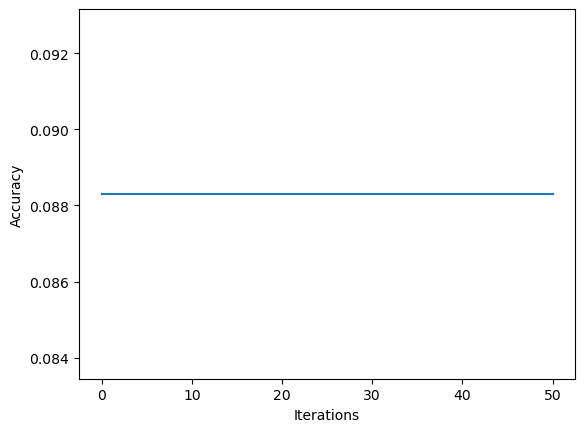

In [166]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [167]:
x_test = handle_nan_values(x_test, delete_nan_columns=False)
x_test, _, _  = standardize(x_test)




In [168]:
### Generate first submission

y_test = x_test[:, [10, 42, 69]].dot(w)

logical_matrix = np.isnan(y_test)
nan_per_columns = np.sum(logical_matrix, axis=0)
print(nan_per_columns)
print(y_test)
y_test = compute_sigmoid(y_test)

y_test[y_test>0] = 1
y_test[y_test<=0] = -1



helpers.create_csv_submission(test_ids, y_test, "AI_crowd_submission")


[0]
[[-0.30974219]
 [-0.02709682]
 [-0.21678842]
 ...
 [-0.21678842]
 [-0.07949182]
 [-0.30974219]]


In [177]:
N, D = x_train.shape

# divide dataset into train and test data in order to test prediction on other data than was used for testing
train_data_size = int(N/2)
local_test_data_size = N - train_data_size

tx = x_train_std[:train_data_size, :]
y = y_train[:train_data_size]
x_local_test = x_train_std[train_data_size:, :]
y_local_test = y_train[train_data_size:]

initial_w = np.full((D), 1e-2) 

max_iters=50
batch_size = 1 
gammas = np.arange(0.005, 0.3, 0.05)
lambdas = np.arange(0.00005, 0.003, 0.0005)

# Evaluate mean_squarred_error_gd
if False:
    accuracies = []
    for gamma in gammas:
        w, loss = mean_squared_error_gd(y, tx, initial_w, max_iters, gamma)
        y_local_pred = predict_y(w, x_local_test)
        local_test_accuracy = ( N - np.sum(y_local_test != y_local_pred) ) / N
        accuracies.append(local_test_accuracy)
        print("Local test accuracy of mean_squared_error_gd with gamma {:.4f} is {:.4f}".format(gamma, local_test_accuracy))
        print("loss is:", loss)

# Evaluate mean_squared_error_sgd
if False:
    accuracies = []
    for gamma in gammas:
        w, loss = mean_squared_error_sgd(y, tx, initial_w, max_iters, gamma, batch_size=128, num_batches=16)
        y_local_pred = predict_y(w, x_local_test)
        local_test_accuracy = ( N - np.sum(y_local_test != y_local_pred) ) / N
        accuracies.append(local_test_accuracy)
        print("Local test accuracy of mean_squared_error_sgd with gamma {:.4f} is {:.4f}".format(gamma, local_test_accuracy))
        print("loss is:", loss)

# Evaluate reg_logistic_regression
if False:
    accuracies = []
    for gamma in gammas:
        for lambda_ in lambdas:
            w, loss = reg_logistic_regression(y, tx, initial_w, max_iters, gamma, lambda_)
            y_local_pred = predict_y(w, x_local_test)
            local_test_accuracy = ( N - np.sum(y_local_test != y_local_pred) ) / N
            accuracies.append(local_test_accuracy)
            print("Local test accuracy of reg_logistic_regression with gamma {:.4f} and lambda {} is {:.4f}".format(gamma, lambda_, local_test_accuracy))
            print("loss is:", loss)

gamma = 0.255
lambda_ = 0.002
max_iters = 300
#w, loss = mean_squared_error_gd(y_train, x_train_std, initial_w, max_iters, gamma)
reg_logistic_regression(y, tx, initial_w, max_iters, gamma, lambda_)
y_test = predict_y(w, x_test)

helpers.create_csv_submission(test_ids, y_test, "AI_crowd_submission2")




/home/username/XD/Uni local/ML_Project1/functions.py:22: RuntimeWarning: overflow encountered in exp
  sigmoid = 1/(1+np.exp(-x))
/home/username/XD/Uni local/ML_Project1/functions.py:72: RuntimeWarning: overflow encountered in exp
  return loss


ValueError: x and y must have same first dimension, but have shapes (500,) and (50,)

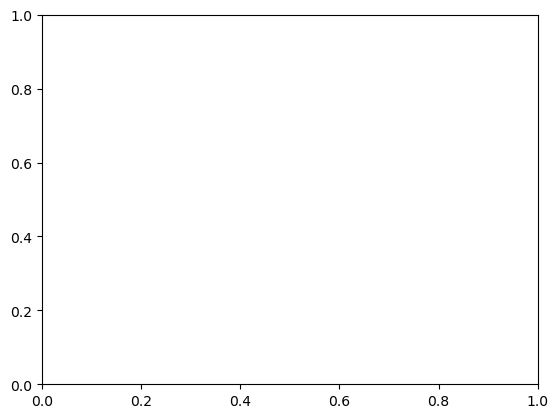

In [170]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()